# PRICE PREDICTION MODEL

Dataset source:https://www.kaggle.com/datasets/justinpakzad/vestiaire-fashion-dataset


DATA PREPERATION


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


# Read the CSV file into a DataFrame
price_df = pd.read_csv('/content/drive/MyDrive/sample_data/vestiaire.csv')

# Display the first few rows of the DataFrame
price_df.head()



,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970.0,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770.0,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365.0,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949.0,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605.0,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [ ]:
price_df.shape

(333692, 36)

In [ ]:
price_df.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970.0,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770.0,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365.0,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949.0,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605.0,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [ ]:
price_df.columns

Index(['product_id', 'product_type', 'product_name', 'product_description',
       'product_keywords', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_like_count', 'sold',
       'reserved', 'available', 'in_stock', 'should_be_gone', 'brand_id',
       'brand_name', 'brand_url', 'product_material', 'product_color',
       'price_usd', 'seller_price', 'seller_earning', 'seller_badge',
       'has_cross_border_fees', 'buyers_fees', 'warehouse_name', 'seller_id',
       'seller_username', 'usually_ships_within', 'seller_country',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')

In [ ]:
price_df.drop(['product_id',
     'product_like_count', 'sold', 'reserved', 'available',
    'in_stock', 'should_be_gone', 'brand_id', 'brand_url',
     'seller_badge', 'seller_products_sold',
    'seller_num_products_listed', 'seller_community_rank', 'seller_pass_rate',
    'seller_num_followers','seller_id', 'seller_username'
], axis=1, inplace=True)


In [ ]:
price_df.columns

Index(['product_type', 'product_name', 'product_description',
       'product_keywords', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'brand_name', 'product_material',
       'product_color', 'price_usd', 'seller_price', 'seller_earning',
       'has_cross_border_fees', 'buyers_fees', 'warehouse_name',
       'usually_ships_within', 'seller_country'],
      dtype='object')

In [ ]:
price_df.head()

,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,has_cross_border_fees,buyers_fees,warehouse_name,usually_ships_within,seller_country
0,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,Miu Miu,Wool,Grey,272.92,223.65,216.94,NaN,NaN,Tourcoing,NaN,Germany
1,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,Barbara Bui,Cotton,Navy,127.80,106.50,106.50,True,21.30,Tourcoing,NaN,Belgium
2,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,Comme Des Garcons,Wool,White,1278.00,1065.00,926.55,True,213.00,Tourcoing,1-2 days,Spain
3,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,MSGM,Polyester,Black,163.90,149.00,126.65,True,14.90,Brooklyn,1-2 days,United States
4,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,LVIR,Vegan leather,Black,119.72,99.77,83.55,True,19.95,Crawley,3-5 days,United Kingdom


Checking for null values and removing the rows with null values

In [ ]:
import pandas as pd

# Assuming price_df is your DataFrame

# Check for NaN values in each column
nan_values = price_df.isna().sum()
print("NaN values in each column:\n", nan_values)

# Remove rows with any NaN values
df = price_df.dropna()

# Verify that NaN values are removed
nan_values_after = df.isna().sum()
print("NaN values after removal:\n", nan_values_after)


NaN values in each column:
 product_type                 0
product_name                 0
product_description          0
product_keywords           655
product_gender_target        0
product_category           655
product_season               0
product_condition            0
brand_name                   0
product_material             1
product_color                1
price_usd                    1
seller_price                 1
seller_earning               1
has_cross_border_fees     6339
buyers_fees               6339
warehouse_name               1
usually_ships_within     54299
seller_country               1
dtype: int64
NaN values after removal:
 product_type             0
product_name             0
product_description      0
product_keywords         0
product_gender_target    0
product_category         0
product_season           0
product_condition        0
brand_name               0
product_material         0
product_color            0
price_usd                0
seller_price       

In [ ]:
price_df.shape

(333692, 19)

In [ ]:
df.shape

(273050, 19)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_usd,273050.0,300.780185,728.348265,16.50,74.82,138.02,287.550,121410.00
seller_price,273050.0,254.625679,622.711227,13.85,62.84,117.15,244.950,101175.00
seller_earning,273050.0,219.948061,558.411462,0.00,48.99,101.27,212.945,96009.75
buyers_fees,273050.0,46.156971,112.587951,0.00,11.08,21.09,43.880,20235.00


In [ ]:
df.head()

,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,has_cross_border_fees,buyers_fees,warehouse_name,usually_ships_within,seller_country
2,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,Comme Des Garcons,Wool,White,1278.00,1065.00,926.55,True,213.00,Tourcoing,1-2 days,Spain
3,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,MSGM,Polyester,Black,163.90,149.00,126.65,True,14.90,Brooklyn,1-2 days,United States
4,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,LVIR,Vegan leather,Black,119.72,99.77,83.55,True,19.95,Crawley,3-5 days,United Kingdom
5,Mid-length dress,Mid,"See By Chloe white dress, size 42 IT (size lik...",See by Chloé Cotton - elasthane Dresses,Women,Women Clothing,All seasons,Very good condition,See by Chloé,Cotton - elasthane,White,108.63,90.53,76.68,True,18.11,Tourcoing,1-2 days,France
7,Silk mid-length dress,Silk mid,Plaid sleeveless below knee silk dress. Worn ...,J.Crew Silk Dresses,Women,Women Clothing,All seasons,Very good condition,J.Crew,Silk,Black,76.68,63.90,47.93,True,12.78,Tourcoing,6-7 days,Ireland


In [ ]:
import pandas as pd

# Assuming price_df is your DataFrame

# Print number of unique values in each column
unique_values = df.nunique()
print("Number of unique values in each column:\n", unique_values)


Number of unique values in each column:
 product_type               1811
product_name             188545
product_description      255227
product_keywords          60062
product_gender_target         2
product_category              2
product_season                3
product_condition             5
brand_name                 6014
product_material             50
product_color                23
price_usd                  9656
seller_price               9105
seller_earning            13880
has_cross_border_fees         1
buyers_fees                7400
warehouse_name                4
usually_ships_within          4
seller_country               51
dtype: int64


Dropping features with too many unique values

In [ ]:
df.drop(['product_name','product_description'], axis=1, inplace=True)

<ipython-input-19-db906e4730e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['product_name','product_description'], axis=1, inplace=True)


In [ ]:
df.drop(['product_keywords'], axis=1, inplace=True)

<ipython-input-20-702ed978969a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['product_keywords'], axis=1, inplace=True)


In [ ]:
df.head()

,product_type,product_gender_target,product_category,product_season,product_condition,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,has_cross_border_fees,buyers_fees,warehouse_name,usually_ships_within,seller_country
2,Wool coat,Women,Women Clothing,Autumn / Winter,Very good condition,Comme Des Garcons,Wool,White,1278.00,1065.00,926.55,True,213.00,Tourcoing,1-2 days,Spain
3,Mini skirt,Women,Women Clothing,All seasons,Very good condition,MSGM,Polyester,Black,163.90,149.00,126.65,True,14.90,Brooklyn,1-2 days,United States
4,Vegan leather trousers,Women,Women Clothing,All seasons,Very good condition,LVIR,Vegan leather,Black,119.72,99.77,83.55,True,19.95,Crawley,3-5 days,United Kingdom
5,Mid-length dress,Women,Women Clothing,All seasons,Very good condition,See by Chloé,Cotton - elasthane,White,108.63,90.53,76.68,True,18.11,Tourcoing,1-2 days,France
7,Silk mid-length dress,Women,Women Clothing,All seasons,Very good condition,J.Crew,Silk,Black,76.68,63.90,47.93,True,12.78,Tourcoing,6-7 days,Ireland


In [ ]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_dataframe.csv')

numeric_features = []
categorical_features = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numeric_features.append(column)
    else:
        categorical_features.append(column)

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['price_usd', 'seller_price', 'seller_earning', 'buyers_fees']
Categorical Features: ['product_type', 'product_gender_target', 'product_category', 'product_season', 'product_condition', 'brand_name', 'product_material', 'product_color', 'has_cross_border_fees', 'warehouse_name', 'usually_ships_within', 'seller_country']


In [ ]:
import pandas as pd

# Assuming price_df is your DataFrame

# Print number of unique values in each column
unique_values = df.nunique()
print("Number of unique values in each column:\n", unique_values)

Number of unique values in each column:
 product_type              1811
product_gender_target        2
product_category             2
product_season               3
product_condition            5
brand_name                6014
product_material            50
product_color               23
price_usd                 9656
seller_price              9105
seller_earning           13880
has_cross_border_fees        1
buyers_fees               7400
warehouse_name               4
usually_ships_within         4
seller_country              51
dtype: int64


Label Encoding the categorical features

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)


print(df.head())



<ipython-input-24-6ae0061b0dfd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.fit_transform(df[feature])
<ipython-input-24-6ae0061b0dfd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.fit_transform(df[feature])
<ipython-input-24-6ae0061b0dfd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

   product_type  product_gender_target  product_category  product_season  \
2          1761                      1                 1               1   
3          1010                      1                 1               0   
4          1652                      1                 1               0   
5          1006                      1                 1               0   
7          1239                      1                 1               0   

   product_condition  brand_name  product_material  product_color  price_usd  \
2                  4        1263                49             21    1278.00   
3                  4        3369                28              2     163.90   
4                  4        2957                43              2     119.72   
5                  4        4968                 7             21     108.63   
7                  4        2529                35              2      76.68   

   seller_price  seller_earning  has_cross_border_fees  buyers

<ipython-input-24-6ae0061b0dfd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.fit_transform(df[feature])
<ipython-input-24-6ae0061b0dfd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.fit_transform(df[feature])
<ipython-input-24-6ae0061b0dfd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

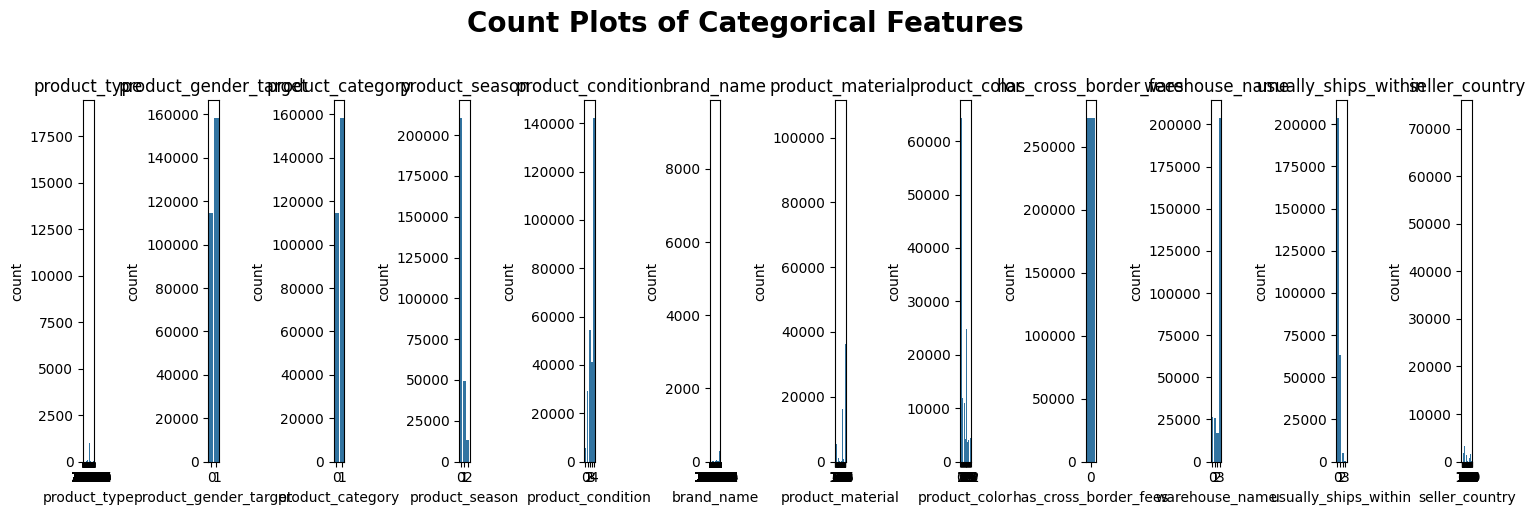

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.suptitle('Count Plots of Categorical Features', fontsize=20, fontweight='bold', y=1.02)

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)  # Adjust this based on the number of categorical features
    sns.countplot(x=df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

Finding Outliers and removing them using IQR Method

<ipython-input-26-16a63828a375>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower_bound, upper_bound)
<ipython-input-26-16a63828a375>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower_bound, upper_bound)
<ipython-input-26-16a63828a375>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

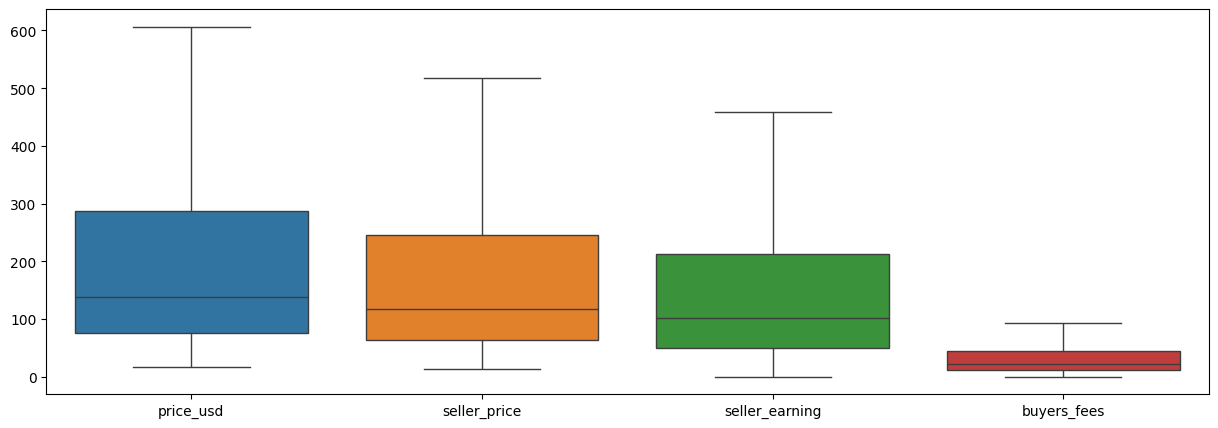

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
def clip_outliers(df):
    for col in df[numeric_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df


df = clip_outliers(df)


# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=df[numeric_features])
plt.show()


<ipython-input-27-e59b50a2466d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower_bound, upper_bound)
<ipython-input-27-e59b50a2466d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower_bound, upper_bound)
<ipython-input-27-e59b50a2466d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

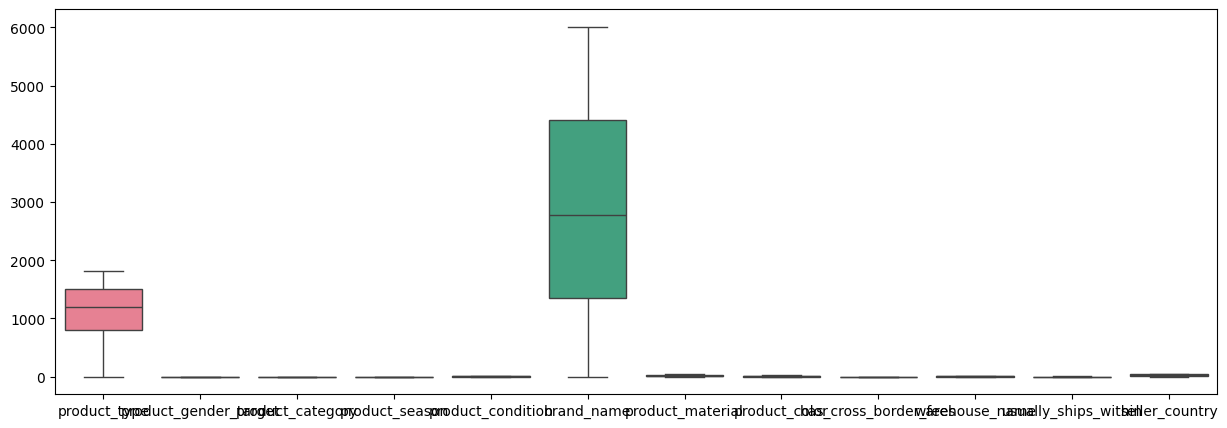

In [ ]:
def clip_outliers(df):
    for col in df[categorical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df


df = clip_outliers(df)


# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=df[categorical_features])
plt.show()


In [ ]:
import pandas as pd

# Assuming price_df is your DataFrame

# Print number of unique values in each column
unique_values = df.nunique()
print("Number of unique values in each column:\n", unique_values)

Number of unique values in each column:
 product_type             1811
product_gender_target       2
product_category            2
product_season              1
product_condition           5
brand_name               6014
product_material           50
product_color              23
price_usd                5778
seller_price             5368
seller_earning           8348
has_cross_border_fees       1
buyers_fees              4055
warehouse_name              4
usually_ships_within        4
seller_country             51
dtype: int64


Plotting correlation Matrix

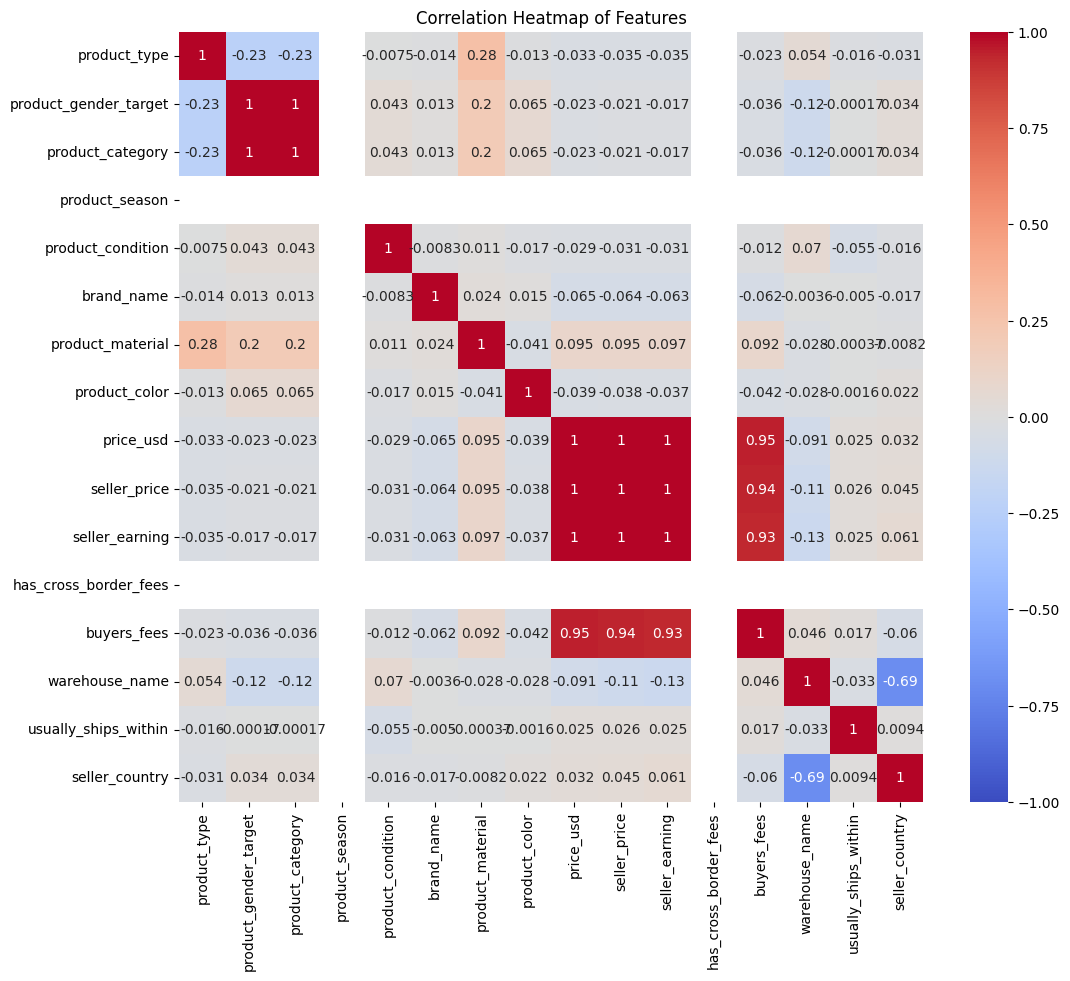

Top features correlated with 'price_usd':
price_usd           1.000000
seller_price        0.999083
seller_earning      0.996946
buyers_fees         0.949142
product_material    0.095473
warehouse_name      0.090728
brand_name          0.064626
product_color       0.039120
product_type        0.033105
seller_country      0.031779
Name: price_usd, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Calculate correlations
correlations = df.corr()

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()

# Identify top features correlated with 'price_usd'
top_features = correlations['price_usd'].abs().sort_values(ascending=False).head(10)
print("Top features correlated with 'price_usd':")
print(top_features)



In [ ]:
df.columns

Index(['product_type', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'brand_name', 'product_material',
       'product_color', 'price_usd', 'seller_price', 'seller_earning',
       'has_cross_border_fees', 'buyers_fees', 'warehouse_name',
       'usually_ships_within', 'seller_country'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming df, X, and y are defined as before
X = df[['seller_price', 'product_material', 'warehouse_name',
        'product_category', 'product_gender_target', 'product_color',
        'usually_ships_within', 'product_condition', 'brand_name','product_type','product_season']]

y = df['price_usd']
#Here seller price is the price paid by the user for the product





In [ ]:
X.head()

,seller_price,product_material,warehouse_name,product_category,product_gender_target,product_color,usually_ships_within,product_condition,brand_name,product_type,product_season
2,518.115,49,3.0,1,1,21,0.0,4,1263,1761,0
3,149.000,28,0.5,1,1,2,0.0,4,3369,1010,0
4,99.770,43,1.0,1,1,2,1.0,4,2957,1652,0
5,90.530,7,3.0,1,1,21,0.0,4,4968,1006,0
7,63.900,35,3.0,1,1,2,2.0,4,2529,1239,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

# Assuming X and y are your feature matrix and target vector respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Fit and transform on training data
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)

# Transform test data (using fitted scaler from training data)
X_test_scaled_standard = scaler_standard.transform(X_test)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

# Save the scalers
joblib.dump(scaler_standard, 'scaler_standard.pkl')
joblib.dump(scaler_minmax, 'scaler_minmax.pkl')


['scaler_minmax.pkl']

In [ ]:
X_test.head()

,seller_price,product_material,warehouse_name,product_category,product_gender_target,product_color,usually_ships_within,product_condition,brand_name,product_type,product_season
5420,50.06,6,3.0,1,1,2,1.0,4,1187,1501,0
13069,26.63,35,3.0,1,1,1,1.0,4,4282,1229,0
307652,112.24,28,1.0,0,0,2,0.0,2,3622,1203,0
178709,63.90,46,3.0,1,1,18,1.0,2,748,1006,0
21362,299.00,6,0.5,1,1,21,1.0,4,3348,1501,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import joblib


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Training and evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R-squared': r2}

    # Save the Random Forest model
    if name == 'Random Forest':
        joblib.dump(model, 'random_forest_model.pkl')
        print("Random Forest model saved!")

# Print results
for name, result in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error (MSE): {result['MSE']}")
    print(f"  Mean Absolute Error (MAE): {result['MAE']}")
    print()


Random Forest model saved!
Linear Regression:
  Mean Squared Error (MSE): 46.30367854026574
  Mean Absolute Error (MAE): 3.860171850791199

Random Forest:
  Mean Squared Error (MSE): 8.97571366514013
  Mean Absolute Error (MAE): 0.42973976081073817

XGBoost:
  Mean Squared Error (MSE): 14.568575069749816
  Mean Absolute Error (MAE): 1.3794515386978536



Random Forest Model is finalised and a flask endpoint is created for further deployment


In [ ]:
!pip install tabulate


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import joblib
from tabulate import tabulate

# Assuming you have already split your data into X_train, X_test, y_train, y_test
# and defined your models dictionary

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Training and evaluation
results = {}
sample_predictions_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae}

    # Save the Random Forest model
    if name == 'Random Forest':
        joblib.dump(model, 'random_forest_model.pkl')
        print("Random Forest model saved!")

    # Show a sample X test data point and its predicted value
    sample_index = 0  # Change this index to view different samples
    sample_X = X_test.iloc[sample_index].to_frame().reset_index(drop=True)
    sample_X_with_labels = pd.concat([pd.DataFrame(sample_X.columns, columns=['Feature']), sample_X.T.reset_index(drop=True)], axis=1)
    sample_y_pred = y_pred[sample_index]

    # Append sample prediction to list
    sample_predictions_list.append({
        'Model': name,
        'Sample X Test Data': sample_X_with_labels.to_string(index=False),
        'Predicted Value': sample_y_pred
    })

# Convert list of dictionaries to DataFrame
sample_predictions = pd.DataFrame(sample_predictions_list)

# Print sample predictions as a table
print("\nSample Predictions:\n")
print(tabulate(sample_predictions, headers='keys', tablefmt='fancy_grid', showindex=False))

# Print evaluation results
for name, result in results.items():
    print(f"\n{name}:")
    print(f"  Mean Squared Error (MSE): {result['MSE']}")
    print(f"  Mean Absolute Error (MAE): {result['MAE']}")


Random Forest model saved!

Sample Predictions:

╒═══════════════════╤══════════════════════════════════════════════════════════════╤═══════════════════╕
│ Model             │ Sample X Test Data                                           │   Predicted Value │
╞═══════════════════╪══════════════════════════════════════════════════════════════╪═══════════════════╡
│ Linear Regression │ Feature     0   1   2   3   4   5   6   7      8      9  10  │           61.8142 │
│                   │     5420 50.06 6.0 3.0 1.0 1.0 2.0 1.0 4.0 1187.0 1501.0 0.0 │                   │
├───────────────────┼──────────────────────────────────────────────────────────────┼───────────────────┤
│ Random Forest     │ Feature     0   1   2   3   4   5   6   7      8      9  10  │           60.07   │
│                   │     5420 50.06 6.0 3.0 1.0 1.0 2.0 1.0 4.0 1187.0 1501.0 0.0 │                   │
├───────────────────┼──────────────────────────────────────────────────────────────┼───────────────────┤
│ XGBo

In [ ]:
X.head()

,seller_price,product_material,warehouse_name,product_category,product_gender_target,product_color,usually_ships_within,product_condition,brand_name,product_type,product_season
2,518.115,49,3.0,1,1,21,0.0,4,1263,1761,0
3,149.000,28,0.5,1,1,2,0.0,4,3369,1010,0
4,99.770,43,1.0,1,1,2,1.0,4,2957,1652,0
5,90.530,7,3.0,1,1,21,0.0,4,4968,1006,0
7,63.900,35,3.0,1,1,2,2.0,4,2529,1239,0


In [ ]:
y.head()

2    606.645
3    163.900
4    119.720
5    108.630
7     76.680
Name: price_usd, dtype: float64

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pickle
import pandas as pd

app = Flask(__name__)

# Load the Random Forest model
model = joblib.load('random_forest_model.pkl')

# Load the label encoders
with open('label_encoders.pkl', 'rb') as file:
    label_encoders = pickle.load(file)

# Load the scalers
scaler_standard = joblib.load('scaler_standard.pkl')
scaler_minmax = joblib.load('scaler_minmax.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    input_data = pd.DataFrame([data])

    # Encode only non-numerical (categorical) features
    for feature in label_encoders:
        if feature in input_data.columns and input_data[feature].dtype == object:
            le = label_encoders[feature]
            input_data[feature] = le.transform(input_data[feature])

    # Extract the features for prediction
    X_new = input_data[['seller_price', 'product_material', 'warehouse_name',
                        'product_category', 'product_gender_target', 'product_color',
                        'usually_ships_within', 'product_condition', 'brand_name',
                        'product_type', 'product_season']]

    # Apply the scalers to the input data
    X_new_scaled_standard = scaler_standard.transform(X_new)
    X_new_scaled_minmax = scaler_minmax.transform(X_new)

    # Predict the price (choose the appropriate scaled data as per your model training)
    prediction = model.predict(X_new_scaled_standard)  # or X_new_scaled_minmax based on your model

    return jsonify({'predicted_price_usd': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
